<a href="https://colab.research.google.com/github/RafaelGallo/Projetos-machine-learning/blob/master/Series_temporais_ARIMA_SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smtsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv("Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
print("Quantidade de linhas e colunas:", df.shape)

Quantidade de linhas e colunas: (159, 7)


In [5]:
print('Quantidade de dados nulos:', df.isna().sum().sum())

Quantidade de dados nulos: 0


In [6]:
df.columns = ["Especie", "Peso", "Comprimento1", "Comprimento2", "Comprimento3", "Altura", "Largura"]

df.head()

,Especie,Peso,Comprimento1,Comprimento2,Comprimento3,Altura,Largura
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


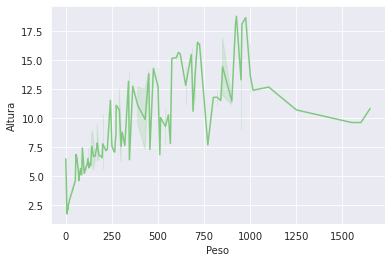

In [7]:
sns.lineplot(x="Peso", y="Altura", data=df)

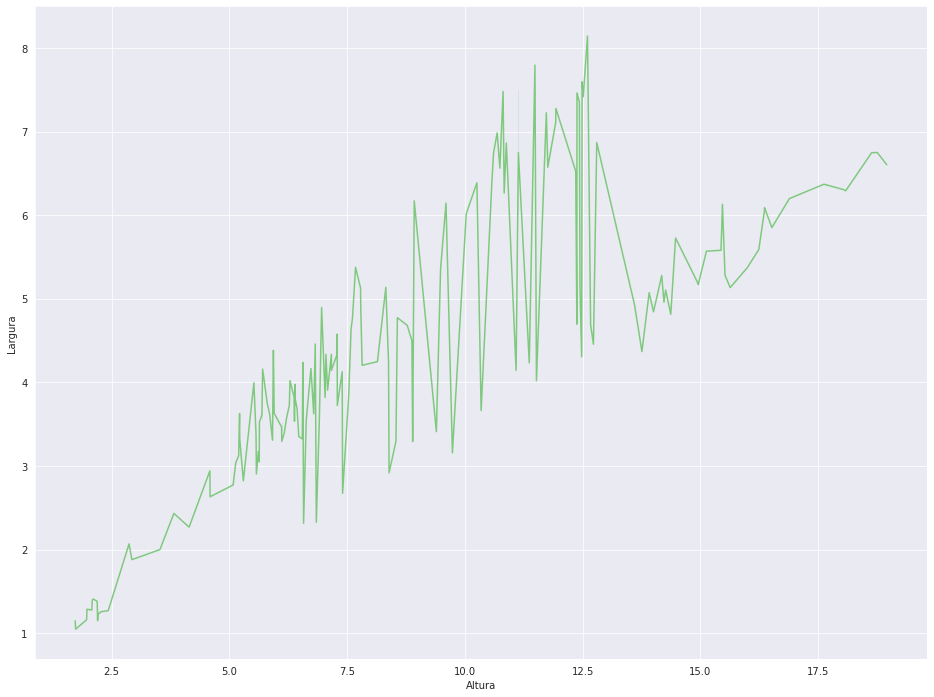

In [8]:
plt.figure(figsize=(16,12))

sns.lineplot(x="Altura", y="Largura", data=df)

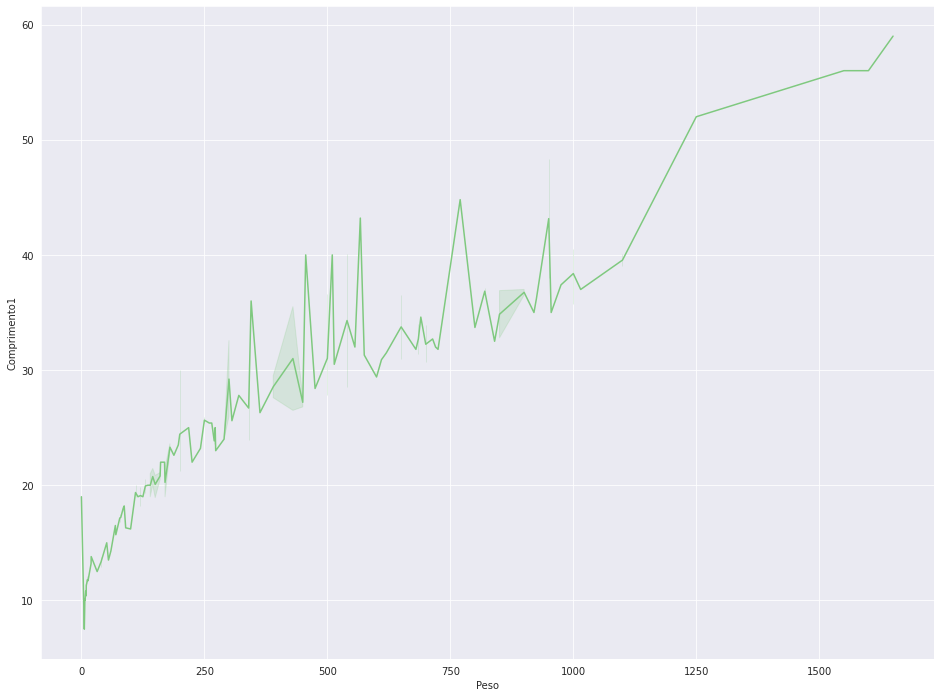

In [9]:
plt.figure(figsize=(16,12))

sns.lineplot(x="Peso", y="Comprimento1", data=df)

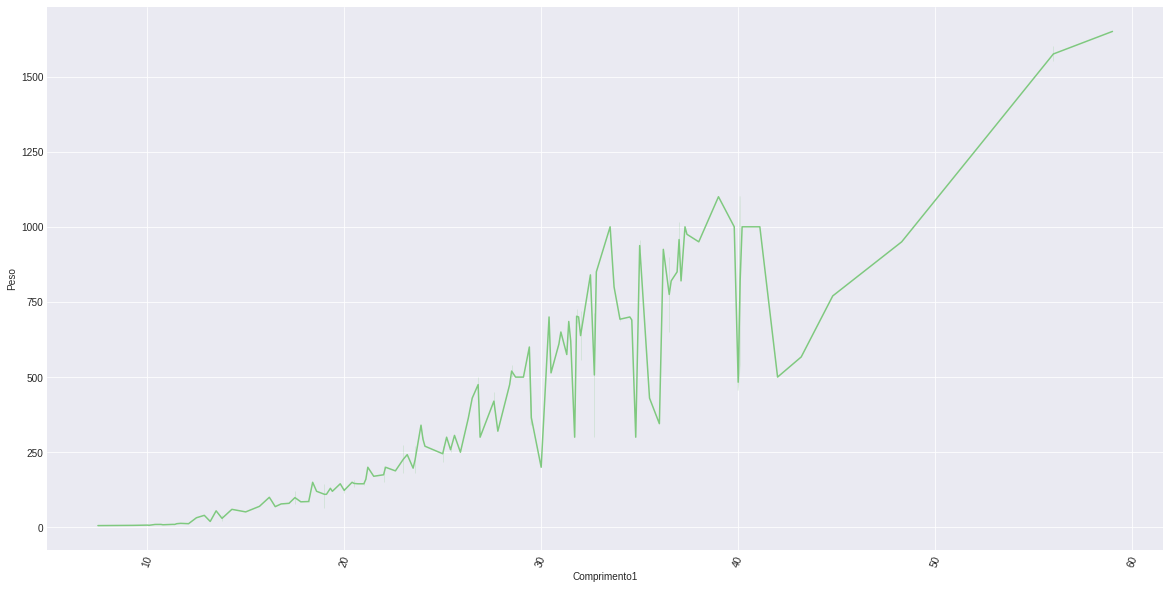

In [10]:
plt.figure(figsize=(20, 10))
plt.style.use('seaborn-darkgrid')

x1 = sns.lineplot(x="Comprimento1", y="Peso", data=df)
plt.xticks(rotation=70);
plt.show()

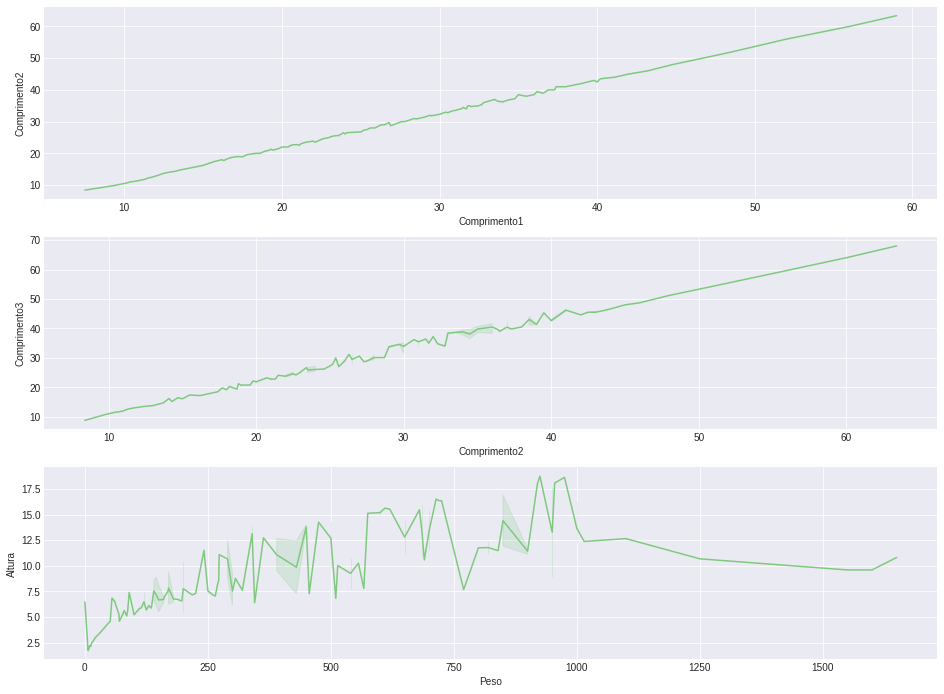

In [11]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)

sns.lineplot(x='Comprimento1', y='Comprimento2', data=df)
plt.subplot(3,1,2)

sns.lineplot(x='Comprimento2', y='Comprimento3', data=df)
plt.subplot(3,1,3)

sns.lineplot(x='Peso', y='Altura', data=df)
ax = ax

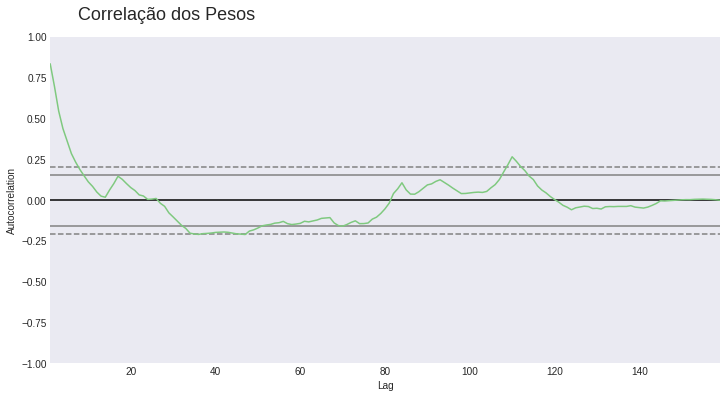

In [12]:
from pandas.plotting import autocorrelation_plot

ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos Pesos', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df['Peso'])
ax = ax

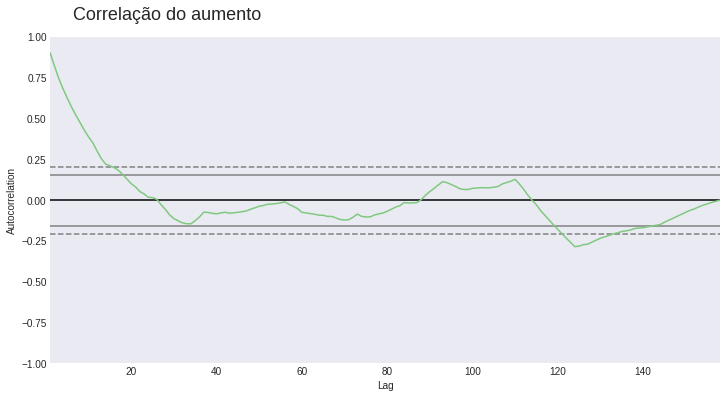

In [13]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df['Altura'][1:])
ax = ax

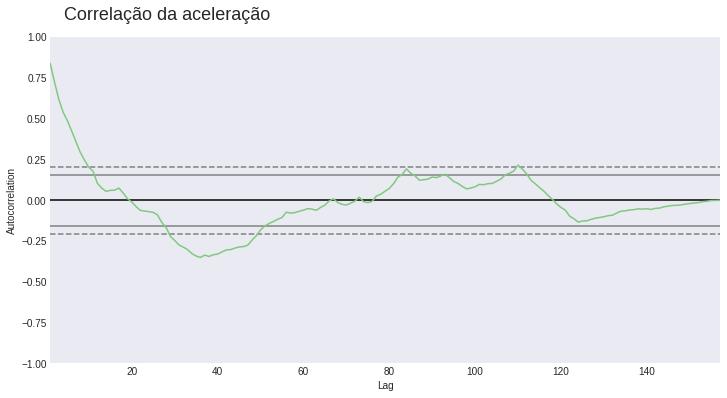

In [14]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df['Largura'][2:])
ax = ax

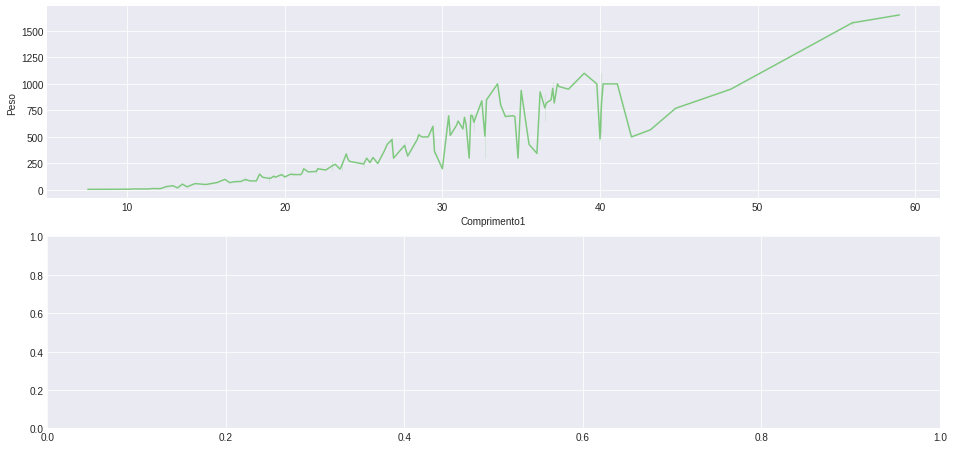

In [15]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)

sns.lineplot(x="Comprimento1", y="Peso", data=df)
plt.subplot(3,1,2)

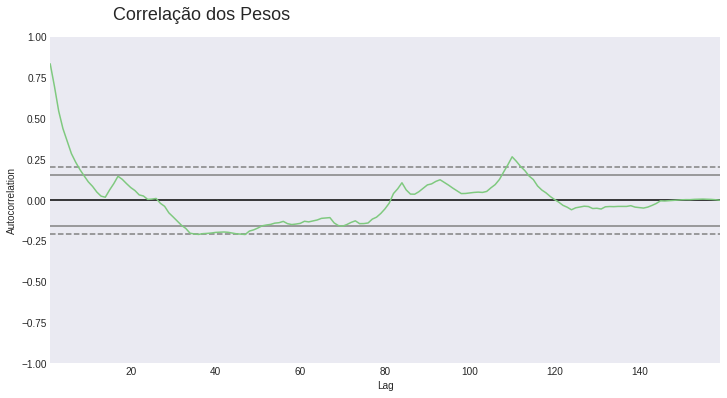

In [16]:
ax = plt.figure(figsize=(12,6))
ax.suptitle("Correlação dos Pesos", fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(df['Peso'])
ax = ax

**Modelo ARIMA, SARIMA**

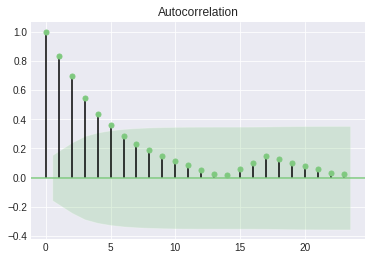

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df["Peso"]);

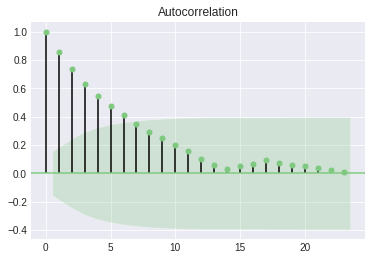

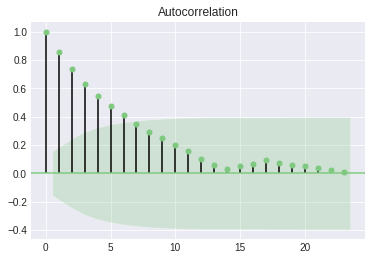

In [18]:
plot_acf(df["Comprimento1"])

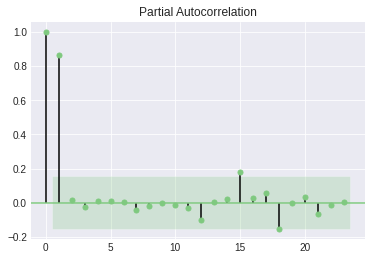

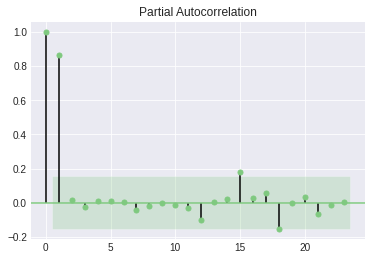

In [19]:
plot_pacf(df["Comprimento2"])

In [20]:
df_1 = df[:26][:]
df_2 = df[26:][:]

In [21]:
from pmdarima.arima import auto_arima
modelo_arima = auto_arima(df_1["Peso"].values, start_p = 0, start_q = 0,
                         max_p = 8, max_q = 8, d = 2, seasonal = False, trace = True,
                         error_action = "ignore", suppress_warnings = True, stepwise = False)

 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=309.744, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=288.859, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=284.902, Time=0.13 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=286.052, Time=0.28 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=282.867, Time=0.30 sec
 ARIMA(0,2,5)(0,0,0)[0] intercept   : AIC=283.454, Time=0.32 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=294.214, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=285.376, Time=0.11 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=285.651, Time=0.23 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=288.183, Time=0.29 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=292.506, Time=0.38 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=291.825, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=287.372, Time=0.10 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=288.528, Time=0.20 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=290.442, Time=0.28 sec
 ARIMA(3,2,0)(0,0,0)[0] i

In [22]:
modelo_arima.aic()

282.86698404688775

In [23]:
modelo_arima.fit(df_1["Peso"]. values)

model_predict = modelo_arima.predict(n_periods = 10)
model_predict

array([731.11663182, 742.21160405, 734.25281022, 741.66583605,
       748.46279201, 754.6436781 , 760.20849432, 765.15724067,
       769.48991716, 773.20652377])

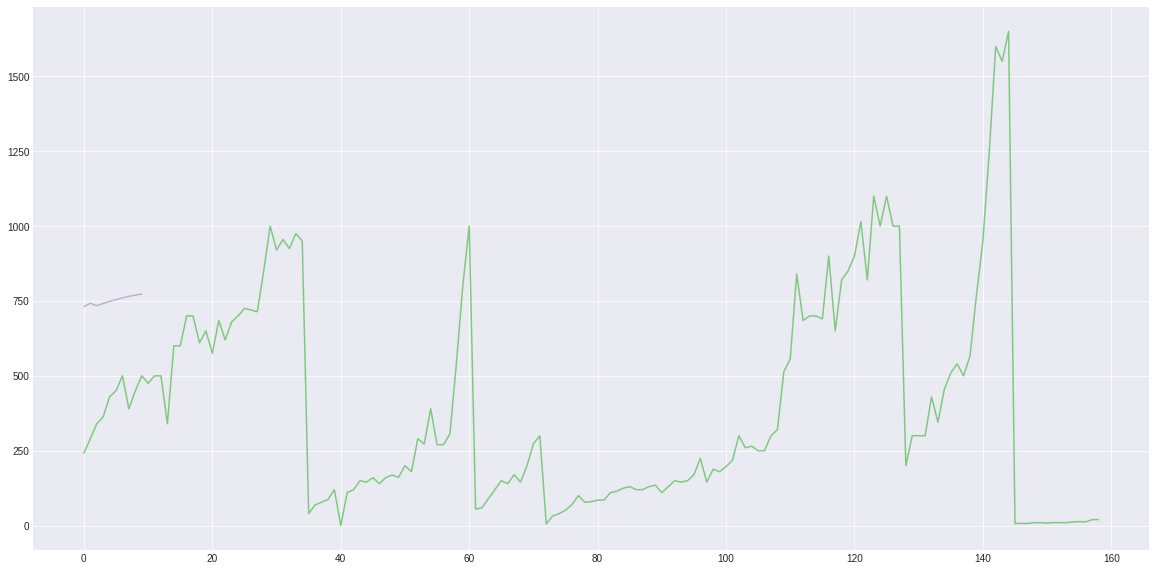

In [24]:
plt.figure(figsize=(20, 10))

plt.plot(df["Peso"])
plt.plot(model_predict)

# **Modelo Sarima**

In [25]:
from pmdarima.arima.utils import nsdiffs

df_s = nsdiffs(df['Peso'].values, m=2, max_D=12, test='ch')
df_s

0

In [26]:
from pmdarima.arima import auto_arima

modelo_sarima = auto_arima(df['Peso'].values,start_p = 0, start_q = 0, max_p = 6, max_q = 6, d = 1,D = 1,
                            start_Q = 2, start_P = 2, max_P = 5, max_Q = 5, m = 3, seasonal = True, trace = True, 
                            error_action ='ignore',
                            suppress_warnings = True, stepwise = False, maxiter = 50)

modelo_sarima.aic()

 ARIMA(0,1,0)(0,1,0)[3]             : AIC=2217.854, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[3]             : AIC=2102.143, Time=0.07 sec
 ARIMA(0,1,0)(0,1,2)[3]             : AIC=2100.590, Time=0.21 sec
 ARIMA(0,1,0)(0,1,3)[3]             : AIC=2101.329, Time=0.53 sec
 ARIMA(0,1,0)(0,1,4)[3]             : AIC=2103.286, Time=0.56 sec
 ARIMA(0,1,0)(0,1,5)[3]             : AIC=2105.051, Time=0.90 sec
 ARIMA(0,1,0)(1,1,0)[3]             : AIC=2170.425, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[3]             : AIC=2101.267, Time=0.14 sec
 ARIMA(0,1,0)(1,1,2)[3]             : AIC=2100.467, Time=0.62 sec
 ARIMA(0,1,0)(1,1,3)[3]             : AIC=2103.286, Time=1.08 sec
 ARIMA(0,1,0)(1,1,4)[3]             : AIC=2104.440, Time=1.41 sec
 ARIMA(0,1,0)(2,1,0)[3]             : AIC=2147.443, Time=0.10 sec
 ARIMA(0,1,0)(2,1,1)[3]             : AIC=2101.700, Time=0.27 sec
 ARIMA(0,1,0)(2,1,2)[3]             : AIC=2102.031, Time=0.74 sec
 ARIMA(0,1,0)(2,1,3)[3]             : AIC=2103.994, Time=1.16 sec
 ARIMA(0,1

2100.467080422057

In [27]:
modelo_sarima.fit(df_1["Peso"]. values)

ml_predict = modelo_sarima.predict(n_periods = 10)
ml_predict

array([770.91797134, 786.50183547, 772.38422467, 826.24746603,
       851.43997406, 846.43288412, 892.71531256, 908.73993433,
       895.04023179, 948.55573405])

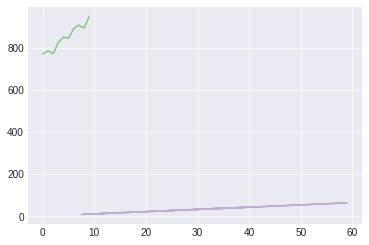

In [28]:
plt.plot(ml_predict)

plt.plot(df["Comprimento1"], df["Comprimento2"])